# Comparative Equilibria Varying dtilde

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
from matplotlib.lines import Line2D
from scipy.special import lambertw
import pickle
import ipynb.fs.defs.Functions_Equilibria_Along_Parameters as sliceFuncs
import ipynb.fs.defs.Functions_Equations_Equilibrium_Simulation as baseFuncs

In [2]:
para = baseFuncs.paraReset()
param_label = "dtilde"
lower = 0.01
upper = 1
data1 = sliceFuncs.paramSlice(param_label, lower, upper, para, param_mesh = 100, init_mesh = 15, stab_slice = False)

C:\Users\grenier\MIT Dropbox\Levi Grenier\Rule dynamics\Up to date code\Modularized code\Functions_Equations_Equilibrium_Simulation.ipynb:249: RuntimeWarning: invalid value encountered in scalar power
  "    sign is a parameter that allows us to change the sign of the output. This allows us to use SciPy's Minimize function.\n",


In [3]:
para = baseFuncs.paraReset()
para['k_P'] = para['k_P']*6
param_label = "dtilde"
lower = 0.01
upper = 1
data2 = sliceFuncs.paramSlice(param_label, lower, upper, para, param_mesh = 100, init_mesh = 15, stab_slice = False)

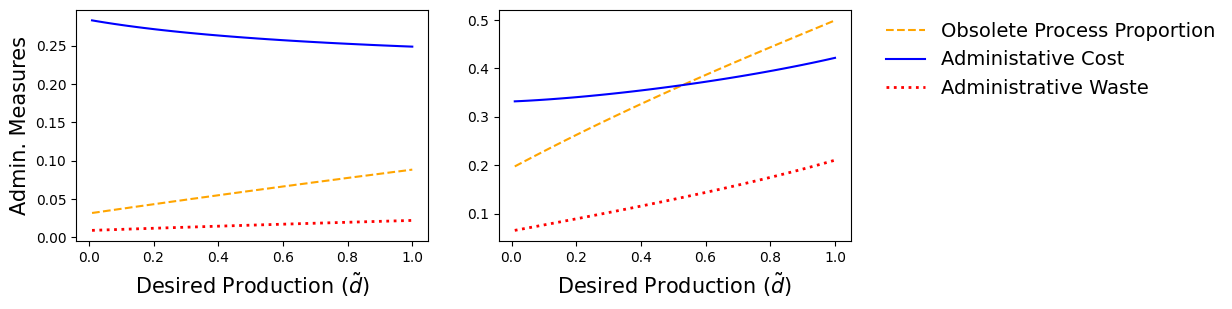

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,3))

prop_Ro_largest = [data1['prop_Ro'][np.nanargmax(data1['utilities'][:, i])][i] for i in np.arange(len(data1['param_vary']))]
prop_w_A_largest = [data1['prop_w_A'][np.nanargmax(data1['utilities'][:, i])][i] for i in np.arange(len(data1['param_vary']))]
ax1.plot(data1['param_vary'], prop_Ro_largest, color = "orange", linestyle = "--", label = r"Obsolete Process Proportion")
ax1.plot(data1['param_vary'], prop_w_A_largest, color =  "blue", label = r"Administative Cost")
ax1.plot(data1['param_vary'], np.asarray(prop_w_A_largest)*np.asarray(prop_Ro_largest), color =  "red", linewidth = 2, linestyle = ":", label = r"Administrative Waste")
#fig.suptitle("Equilibirum Administrative Cost and \nWaste as Desired Prduction Increases", fontsize = 13)
ax1.set_xlabel(r"Desired Production ($\tilde d$)", fontsize = 15)
ax1.set_ylabel("Admin. Measures", fontsize = 15)
#ax1.set_ylim([0,1])
#ax1.set_xlim([0,1])
#ax1.legend()

prop_Ro_largest = [data2['prop_Ro'][np.nanargmax(data2['utilities'][:, i])][i] for i in np.arange(len(data2['param_vary']))]
prop_w_A_largest = [data2['prop_w_A'][np.nanargmax(data2['utilities'][:, i])][i] for i in np.arange(len(data2['param_vary']))]
ax2.plot(data2['param_vary'], prop_Ro_largest, color = "orange", linestyle = "--", label = "Obsolete Process Proportion")
ax2.plot(data2['param_vary'], prop_w_A_largest, color =  "blue", label = "Administative Cost")
ax2.plot(data2['param_vary'], np.asarray(prop_w_A_largest)*np.asarray(prop_Ro_largest), linewidth = 2, color =  "red", linestyle = ":", label = r"Administrative Waste")
#fig.suptitle("Equilibirum Administrative Cost and \nWaste as Desired Prduction Increases", fontsize = 13)
ax2.set_xlabel(r"Desired Production ($\tilde d$)", fontsize = 15)
#ax2.set_ylim([0,1])
#ax2.set_xlim([0,1])
ax2.legend(bbox_to_anchor = (1.05,1.025), frameon = False, fontsize = 14)
plt.savefig("Fig7_dtilde.png", dpi = 300, bbox_inches = "tight")
plt.show()